# __COMPUTATION II: ALGORITHMS & DATA STRUCTURES__

# PROJECT

Group Name: Group 60

Group Members: Gonçalo Palhoto, Gonçalo Morais, Tiago da Cruz

Student Numbers:  20231639, 20230000, 20231682

--------------------------
**Don't change or modify the order and titles of this notebook.** However, feel free to add as many cells as you want between sections.

Good luck!

# Section 1: Dataset

Read and store the dataset file provided to you (`sales_dataset_group_<X>.pkl`).

Store the dataset under the variable name `dataset`.

In [ ]:
import pickle
with open("sales_dataset_group_60.pkl", "rb") as file:
        dataset = pickle.load(file)
dataset[0]

FileNotFoundError: [Errno 2] No such file or directory: 'sales_dataset_group_60.pkl'

# Section 2: Fixing problems in the dataset

Fix here any problems you may find in the dataset while you're developing the project.

**Do not modify the dataset anywhere else except in this section!**

In [ ]:
def data_structure_check(dataset):
  """
  Description:

    This function iterates through all key-item pairs within the list's
    dictionaries and checks if their type is in accordance to the expected
    type:
      name, date, item - string
      unit price, - float
      quantity - integer

  Parameters:

    dataset - our only parameter is the dataset itself, from which the indexes
    of the unformatted dictionaries will be stored.

  Output:

    The output is the list with the indexes of the unformatted dictionaries.
  """
  # storing the indexes of the dictionaries with the errors
  quarantine_list = []

  # iterating through each purchase
  for i in range(len(dataset)):

    # checking if name, date and item are all strings
    if (
        not (isinstance(dataset[i]["Name"], str) and
             isinstance(dataset[i]["Date"], str) and
             isinstance(dataset[i]["Item"], str))
    ):
      quarantine_list.append(i)

    # checking if unit_price is a float or integer
    elif not isinstance(dataset[i]["Unit Price"], (float, int)):
      quarantine_list.append(i)

    # checking if quantity is an integer
    elif not isinstance(dataset[i]["Quantity"], int):
      quarantine_list.append(i)

  return quarantine_list

quarantine_list = data_structure_check(dataset)
# for i in quarantine_list:
#   print(i, dataset[i])

def dataset_item_orderer(dataset, q_list):
    """
    Description:

      This function will take the dictionaries previously deemed as "unformatted",
      and attempt to format those. Simultaneously, those which cannot be restructured
      to fit the dataset will be removed.

    Parameters:

      dataset - the dataset itself, from which the indexes of the "too far gone"
      dictionaries (as in those with no hopes of being reorganized) will be set apart.

      q_list - the quarantine list obtained from data_structure_check(), containing
      the indexes of all unformatted dictionaries.

    Output:

      dataset - the updated version of the inputted dataset, meaning after adjusting
      the dictionaries which could be adjusted and removing those which could not.
      Be mindful that this is not a new list: the dataset is permanently changed.
    """

    # the ideal order for our dictionaries' items type
    goal = [str, str, str, float, int]

    new_q_list = []

    # iterating through our quarantine list
    for index in q_list:

        # acquiring the list for the current dictionary's items type
        curr_dict_dtypes = [type(dataset[index][key]) for key in dataset[index]]

        # verifying if the list has the correct number of strings, floats and integers
        num_str, num_float, num_int = (0, 0, 0)
        for dtype in curr_dict_dtypes:
            if dtype == str:
                num_str += 1
            elif dtype == float:
                num_float += 1
            elif dtype == int:
                num_int += 1

        # removing the dictionaries with the incorrect amount of strings, floats and ints
        if not (num_str == 3 and num_int == 1 and num_float == 1):
            new_q_list.append(index)
            continue

        # getting the indexes for the misplaced items
        misplaced = []
        for i in range(len(curr_dict_dtypes)):
            if goal[i] != curr_dict_dtypes[i]:
                misplaced.append(i)
        # print("\nMisplaced:", misplaced)

        # assuring there are only two misplaced data types
        if len(misplaced) != 2:
            new_q_list.append(index)
            continue

        # print(f"Non-updated:", dataset[index])
        # swapping the items in the actual dictionary
        keys_ = ["Name", "Date", "Item", "Unit Price", "Quantity"]
        dataset[index][keys_[misplaced[0]]], dataset[index][keys_[misplaced[1]]] = (
            dataset[index][keys_[misplaced[1]]], dataset[index][keys_[misplaced[0]]])
        # print(f"Updated:", dataset[index])

    # removing all unusable dictionaries from the dictionary
    print(f"original length of the dataset: {len(dataset)}")
    for i in new_q_list[::-1]:
        dataset.pop(i)
    print(f"updated length of the dataset: {len(dataset)}")
    print(f"length of the new_q_list: {len(new_q_list)}")

    return dataset

In [ ]:
dataset = dataset_item_orderer(dataset, data_structure_check(dataset))

original length of the dataset: 1579
updated length of the dataset: 1456
length of the new_q_list: 123


# Section 3: Extraction of Information

### Extraction of recency, frequency and monetary values

In [ ]:
def get_months(year):
    """
    Description:
        This function recieves a year and returns a dictionary
        with all months and the number of days in each month of that year.

    Parameters:
        year (str or int) - the year of which we wish to recieve the months
        of.

    Output:
        months (dict) - a dictionary where each key is the 'number' of each month
        and its value is the number of days it has.
    """
    # Until August the odd months have 31 days
    months = {i: 31 if i%2 != 0 else 30 for i in range(1,8)}

    # From August onwards it's the even months that do
    for i in range(8, 13):
        if i%2 == 0:
            months[i] = 31
        else:
            months[i] = 30

    # Checking if the year is bissexto and setting the month of Feb accordingly
    # <This (...) occurs in each year that is a multiple of 4, except for years
    # evenly divisible by 100 but not by 400.>
    # SOURCE: https://en.wikipedia.org/wiki/Leap_year
    if int(year) % 4 == 0 and not(int(year)%100 == 0 and not(int(year)%400 == 0)):
        months[2] = 29
    else:
       months[2] = 28

    return months


def get_date_difference(date1, date2=['2024','03','01']):
    """
    Description:
        This function recieves two dates and returns the difference in days between them.

    Example:
        2024-05-30 minus 2024-05-28 = 2 days.

    Parameters:
        date1, date2 (list) - The two dates we wish to know the difference of.
        The dates must be lists with len=3, where each element (int or str) is the year, month and day.
        Both need to be in the format yy-mm-dd.
        date2 must always be the most recent, and is set as default to be the current date.

    Output:
        difference (int) - the number of days that occurred between the two dates.
    """
    # Checking the number of years between the 2 dates
    years_apart = int(date2[0]) - int(date1[0])

    # Creating a list the year(s) bettween the 2 dates;
    # If they're on the same yr, the list will contain only that year.
    years_passed = [int(date1[0])+i for i in range(years_apart + 1)] # The +1 in the range assures that the last/current year is in the lt.

    #Getting the months dict for all years that passed
    days_passed = {}
    for year in years_passed:
        days_passed[year] = get_months(year)


    # Setting the current year dict to have only the days that have already passed:
    # Setting the current month to count the current day
    days_passed[int(date2[0])][int(date2[1])] = int(date2[2])

    # Setting every other month to have 0 days
    for i in range(int(date2[1])+1, len(days_passed[int(date2[0])])+1):
        days_passed[int(date2[0])][i] = 0



    # Setting the other date's year dict to count only the days left until the end of the year:
    # Setting the previous date's month to only have the n of days left
    days_passed[int(date1[0])][int(date1[1])] -= int(date1[2])

    #Setting every other previous month to have 0 days
    for i in range(1, int(date1[1])):
        days_passed[int(date1[0])][i] = 0



    # Having only the days between the 2 dates, we just have to store the sum in a var
    difference = 0
    for year in days_passed:
        for month in days_passed[year]:
            difference += days_passed[year][month]

    return difference

#print(get_date_difference(['2023','10','03'], ['2024','03','01']))

In [ ]:
# Getting a list with the names of the students
students_lt = []
for purchase in dataset:
    if purchase["Name"] not in students_lt:
        students_lt.append(purchase["Name"])

# Extracting the information:
# Creating a list where we will store the info for each student, in the same order as the students_lt
extracted_info = []

# iterating through all the students
for i, name in enumerate(students_lt):

    # initializing the vars that will be adjusted for each student
    monetary = 0
    frequency = 0
    recency = 10_000 # We initialize this var with a large value in order to ensure we find the smallest

    #iterating through the dataset to find all purchaces of the student
    for purchase in dataset:
        if name == purchase["Name"]:

            # adjusting the variables accordingly
            monetary += float(purchase["Unit Price"]) * float(purchase["Quantity"])
            frequency += 1
            date_difference = get_date_difference(purchase["Date"].split("-"))
            if recency > date_difference:
                recency = date_difference

    # appending the student's info to the extracted_info list
    extracted_info.append({
        "Recency": recency,
        "Frequency": frequency,
        "Monetary": round(monetary, 2),
    })

#for i in range(len(students_lt)):
#    print(f'{students_lt[i]}: {extracted_info[i]}')

### Histograms

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

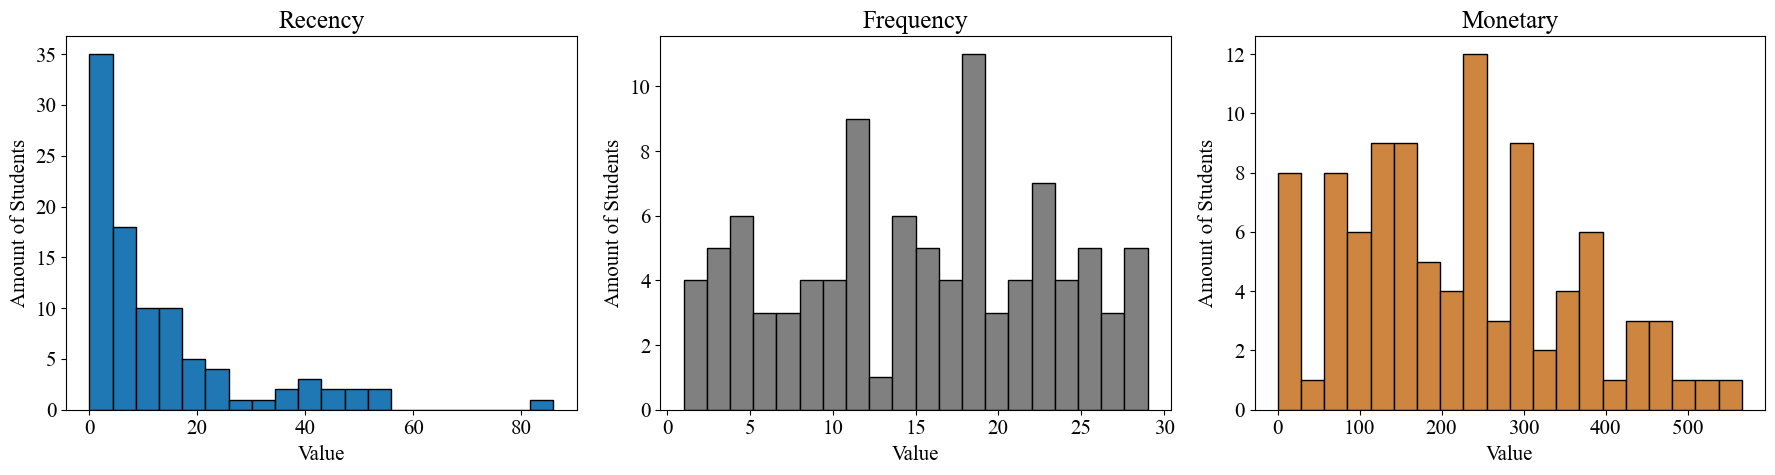

In [ ]:
# Getting the information to be plotted
recency_values = np.array([extracted_info[i]['Recency'] for i in range(len(extracted_info))])
frequency_values = np.array([extracted_info[i]['Frequency'] for i in range(len(extracted_info))])
monetary_values = np.array([extracted_info[i]['Monetary'] for i in range(len(extracted_info))])

# Creating and editing the figures and plots
matplotlib.rcParams.update({'font.size': 15, 'font.family': 'times new roman'})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (18,5))

axes[0].hist(recency_values, bins=20, edgecolor='black')
axes[0].set_title('Recency')

axes[1].hist(frequency_values, bins=20, color='grey', edgecolor='black')
axes[1].set_title('Frequency')

axes[2].hist(monetary_values, bins=20, color='peru', edgecolor='black')
axes[2].set_title('Monetary')

for ax in axes:
    ax.set_xlabel('Value')
    ax.set_ylabel('Amount of Students')

fig.tight_layout()

plt.show()

# Section 4: Sorting

### First RFM scores (RFM)

In [ ]:
names_RFM = [(students_lt[i], recency_values[i], frequency_values[i], monetary_values[i]) for i in range(len(students_lt))]
names_RFM[:20]

[('Davyd', 34, 18, 189.6),
 ('Vidhi', 1, 18, 141.3),
 ('Khadija', 5, 16, 252.4),
 ('Jean', 1, 23, 141.9),
 ('Beatris', 12, 12, 98.5),
 ('Carlos', 10, 28, 455.1),
 ('Iurii', 9, 12, 70.5),
 ('Vasco', 3, 24, 127.7),
 ('Mariana', 10, 17, 394.3),
 ('Bruno', 17, 4, 29.8),
 ('Francisco', 7, 18, 359.6),
 ('Tomás', 13, 14, 150.1),
 ('Wilker', 0, 25, 294.3),
 ('Sofia', 3, 21, 160.3),
 ('Andrii', 2, 24, 359.1),
 ('Jose', 8, 25, 450.9),
 ('Beatriz', 2, 16, 106.2),
 ('Zain', 3, 12, 254.4),
 ('Mootez', 8, 29, 395.4),
 ('Maria', 2, 23, 224.2)]

In [ ]:
# As the extracted_info data is relatively small, we don't have to worry
# too much about space complexity, thus we apply merge sort to all

def merge(left, right, rfm):
  """
    A subfunction used in the merge_sort algorithm.
    Merges two sorted lists, resulting in another
    sorted list.
  """
  if rfm == 'r':
      rfm = 1
  elif rfm == 'f':
      rfm = 2
  elif rfm == 'm':
      rfm = 3
  elif rfm == 'rfm':
      rfm = 1

  output = []
  i = j = 0
  while i < len(left) and j < len(right):
      # We use the parameter rfm to select the value to make the comparison
      if left[i][rfm] > right[j][rfm]:
          output.append(left[i])
          i += 1
      else:
          output.append(right[j])
          j += 1
  output.extend(left[i:])
  output.extend(right[j:])
  return output


def merge_sort(seq, rfm):
  """
  Description:
      Sorts a given sequence in relation to the parameter 'rfm'.
  Parameters:
      seq (list) - the sequence to be sorted.
      rfm (str) - the aspect in which we wish to sort the sequence.
  Output:
      seq (list) - the sorted list.
  """
  if len(seq) == 1:
      return seq
  idx_half = len(seq) // 2
  left = seq[:idx_half]
  right = seq[idx_half:]
  return merge(merge_sort(left, rfm), merge_sort(right, rfm), rfm)



def sort_(names_RFM, rfm):
  """
  Description:
      This function is used to call the merge sort algorithm and to alter
      the sequence/ select the desired output in accordance with the
  Parameters:
      names_RFM (list) -
      rfm (str) -
  Output:
      names_RFM - the sorted list in the case of parameter 'rfm' being 'rfm'
      names (list) - a list with only the names of the students, sorted in
      accordance with the parameter 'rfm'
  """
  names_RFM = merge_sort(names_RFM, rfm)
  names = [element[0] for element in names_RFM]
  if rfm == 'r':
      names = names[::-1]
  if rfm == 'rfm':
      return names_RFM

  return names

In [ ]:
rfm_scores = {}

#### Recency

In [ ]:
scores_recency = {i: [] for i in range(3,0,-1)}
students_lt = sort_(names_RFM, 'r')

division_point = len(students_lt)//3

scores_recency[3].extend(students_lt[:division_point])
scores_recency[2].extend(students_lt[division_point: 2*division_point])
scores_recency[1].extend(students_lt[2*division_point:])
# print(scores_recency)

for key in scores_recency:
    for student in scores_recency[key]:
        rfm_scores[student] = str(key)

#### Frequency

In [ ]:
scores_frequency = {i: [] for i in range(3,0,-1)}
students_lt = sort_(names_RFM, 'f')

scores_frequency[3].extend(students_lt[:division_point])
scores_frequency[2].extend(students_lt[division_point: 2*division_point])
scores_frequency[1].extend(students_lt[2*division_point:])
# print(scores_frequency)

for key in scores_frequency:
    for student in scores_frequency[key]:
        rfm_scores[student] += str(key)

#### Monetary

In [ ]:
scores_monetary = {i: [] for i in range(3,0,-1)}
students_lt = sort_(names_RFM, 'm')

scores_monetary[3].extend(students_lt[:division_point])
scores_monetary[2].extend(students_lt[division_point: 2*division_point])
scores_monetary[1].extend(students_lt[2*division_point:])
# print(scores_monetary)

for key in scores_monetary:
    for student in scores_monetary[key]:
        rfm_scores[student] += str(key)

- Can you determine which students are most valuable to our SU, considering that our
organization is evil and values students solely based on their purchase history?

Answer:

In [ ]:
# Converting the rfm_scores dict into a lt with tuples
rfm_scores = [(key, val) for key, val in rfm_scores.items()]
# print(rfm_scores)

# Sorting the rfm_scores dict:
rfm_scores = sort_(rfm_scores, 'rfm')
# print(rfm_scores)

# Searching the names:
most_valuable_studs = []
for i in range(len(rfm_scores)):
    if rfm_scores[i][1] == '333':
        most_valuable_studs.append(rfm_scores[i][0])
    else:
        break

# Writing the answer
answer = f'The most valuable students are '
for i in range(len(most_valuable_studs) - 1):
    answer += most_valuable_studs[i] + ", "
answer += "and  " + most_valuable_studs[-1] + "."
print(answer)

The most valuable students are Abdul, Martim, Maryam, Andrii, Madalena, Guilherme, Carlota, Srijan, João, Victoriya, and  Wilker.


### Second RFM Scores (RFM')

In [ ]:
import itertools


def create_combinations_dict(n):
    """
    Description:

        This function's purpose is obtaining all combinations of the numbers 3, 2, and 1 with n characters.

    Parameters:

        n - the number of characters for the combinations of 3, 2 and 1.
        i.e. with n = 1 -> keys = [3, 2, 1]
            n = 2 -> keys = [33, 32, 31, 23, 22, 21, 13, 12, 11]

    Output:

        combination_dict - a dictionary whose keys are all integer combinations of 3, 2, and 1. the items are all empty
        lists
        keys - list of all combinations of 3, 2, and 1 with the given n characters.
    """

    # Create all combinations of length n with replacement from [1, 2, 3]
    combinations = itertools.product([3, 2, 1], repeat=n)

    # Convert each combination tuple to a single integer key
    keys = [int(''.join(map(str, combo))) for combo in combinations]

    # Create a dictionary with these keys, initializing each value to 'item'
    combination_dict = {key: [] for key in keys}

    return combination_dict, keys


def bucket_maker(buckets_dict, rfm, names_rfm):
    """
    Description:

        This function creates a new set of 3 buckets for each bucket, further organizing these according to either
        recency, frequency or monetary. Each bucket is an item assigned to a key with a combination of the characters
        [3, 2, 1]. Once the function is applied, the length of the original dictionary is tripled.

    Parameters:

        buckets_dict - a dictionary with minimum three buckets of names sorted in order to either r, f or m.
        rfm - a letter "r", "f", or "m", depending on which variable will re-order and divide the new buckets: "recency",
        "frequency" or "monetary", respectively.
        names_rfm - the list of tuples with each student's given value for "recency", "frequency" or "monetary".

    Output:

        new_dict - the modified dictionary which assumes the following structure: a dictionary with thrice as many
        buckets as the input, created from the previous buckets and sorted in order to the rfm parameter.
    """

    num_of_buckets = len(buckets_dict)
    buckets_dict_keys = list(buckets_dict.keys())

    # iterating through the buckets in the buckets_dict
    for key in buckets_dict_keys:

        # Initialize an empty list to store the tuples
        result_tuples = []

        # Iterate over the names in buckets_dict
        for name in buckets_dict[key]:

            # Find the tuple in names_rfm with the same name
            for tup in names_rfm:

                # If a matching tuple is found, append it to the result list
                if tup[0] == name:
                    result_tuples.append(tup)

        # sort our list through the sort_ function according to the desired rfm parameter
        sorted_lt = sort_(result_tuples, rfm)

        # replacing the items by their sorted versions
        buckets_dict[key] = sorted_lt

    # defining a new dictionary as well as its listed keys
    new_dict, new_dict_keys = create_combinations_dict(len(str(list(buckets_dict.keys())[0])) + 1)

    # dividing the buckets_dict's items into three and turning them into their own items
    i = 0
    for key in buckets_dict:
        division_point = len(buckets_dict[key]) // 3

        # assigning the correct amount of names to each bucket
        new_dict[new_dict_keys[i]].extend(buckets_dict[key][:division_point])
        new_dict[new_dict_keys[i+1]].extend(buckets_dict[key][division_point: 2*division_point])
        new_dict[new_dict_keys[i+2]].extend(buckets_dict[key][2*division_point:])
        i += 3

    return new_dict


# when calling the function, the first parameter must always have a "copy()" after, so as to prevent issues with
# the updated buckets_dict

print(scores_recency)
one = bucket_maker(scores_recency.copy(), "f", names_RFM)
rfm_two = bucket_maker(one.copy(), "m", names_RFM)
print(one)
print(rfm_two)

{3: ['Wilker', 'Victoriya', 'João', 'Alexandre', 'Srijan', 'Carlota', 'Peter', 'Vidhi', 'Jean', 'Guilherme', 'Madalena', 'Antonelli', 'Artem', 'Angelo', 'Andrii', 'Beatriz', 'Maria', 'Krish', 'Diogo', 'Maryam', 'Rita', 'Duarte', 'Martim', 'Bhawna', 'David', 'Cecília', 'Vasco', 'Sofia', 'Zain', 'Abdul', 'André', 'Fausto'], 2: ['Henry', 'María', 'Ansh', 'Khadija', 'Miguel', 'Xinyi', 'Adriana', 'Aleksei', 'Lowie', 'Pedro', 'Gabriel', 'Joana', 'Filipe', 'Francisco', 'Juliana', 'Jose', 'Mootez', 'Catarina', 'Gonçalo', 'Phat', 'Diana', 'Iurii', 'Hamim', 'Constança', 'Carlos', 'Mariana', 'Cyrine', 'Rodrigo', 'Hassan', 'Armaan', 'Beatris', 'Tomás'], 1: ['Tiago', 'Komail', 'Cicero', 'Andrey', 'Vladislav', 'Bernardo', 'Pansau', 'Bruno', 'Eduardo', 'Leonor', 'Rijan', 'Iryna', 'Emmanuella', 'Inês', 'Márcia', 'Marta', 'Laura', 'Luis', 'Joao', 'Davyd', 'Tomas', 'Antónia', 'Andre', 'Ashool', 'Julia', 'Lourenço', 'Kazi', 'Henrique', 'Carolina', 'Darija', 'Mikhail', 'Matilde']}
{33: ['Maryam', 'Madalen

### Correlation

In [ ]:
import numpy as np
from scipy import stats

list_rfm_scores = [int(tup[1]) for tup in rfm_scores]

list_two = []
for key in rfm_two:
    for i in range(len(rfm_two[key])):
        list_two.append(key)

correlation = stats.spearmanr(np.array(list_rfm_scores), np.array(list_two))[0]

print(f"The Spearman correlation between RFM and RFM' is {correlation}.")

The Spearman correlation between RFM and RFM' is 0.9942828514203194.


# Section 5: Searching

### Linear Search

In [ ]:
def linear_search(name):
    """
    Description:
        This function receives a name and finds it, specifically, in the rfm_scores lt.
    Parameters:
        name (str) - as the goal is to find the RFM score of a given person within
        the rfm_scores lt, we only need to have the name as parameter. (the contents of
        the list in which we look for names is always the same at this point)
    Output:
        i (int) - the position of the information of the person we look for in the rfm_scores lt
        person[1] (str) - the score of the person
        None - The function returns None in the cases of the person not being present in the rfm_scores lt
    """
    for i, person in enumerate(rfm_scores):
        if person[0] == name:
            return i, person[1]
    return None

- Who do you think is the best student/customer among your group?

Answer:

In [ ]:
to_find = ['Gonçalo', 'Tiago', 'Diogo']
for name in to_find:
    print(f'{name} has an RFM score of {linear_search(name)[1]}')
print(f'Thus, the best customer is Diogo with a score of 322')

Gonçalo has an RFM score of 222
Tiago has an RFM score of 111
Diogo has an RFM score of 322
Thus, the best customer is Diogo with a score of 322


### Alphabetical Sorting

In [ ]:
def convert_numeric(string):
    """
    Description:
        In this function we gave numeric values in ascending order to all the letters (letters with signals, tildes or any other
        kind of ponctuation were given the same value).
        Then we "sliced" the names into letters to then compare the values we attributed to each letter on sorting the names by
        alphabetic order.
    Parameters:
        string (str) - the name of a person.
    Output:
        numeric_rep (list) - a list where each element is the number associated
        with the position of the name's letter in the alphabet.
    """
    letters = [["ã", "a", "á"], "b", ["c", "ç"], "d", ["e", "ê", "é"], "f", "g", "h", ["i", "í"], "j", "k", "l", "m",
              "n", ["o", "ó"], "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]

    # Defining a number to each letter
    letter_val_dict = {}
    for i, letter in enumerate(letters):
        if isinstance(letter, list):
            for something in letter:
                letter_val_dict[something] = i
        else:
            letter_val_dict[letter] = i

    name_splitted = [char for char in string.lower() if char != ' ']
    numeric_rep = [letter_val_dict[char] for char in name_splitted]

    return numeric_rep



# Same thing as in linear search,  we want to sort the rfm_scores lt in order to get the RFM of the student
def alphabetic_sort(rfm_scores):
    """
    Description:
        In this function the names in the rfm_scores list will be sorted by alphabetic order.
        This will be done firstly, by getting every name's numeric representation. Then we implemented a bubble sort type
        function where we start with the first two names and we compare them and if the second name is first in alphabetic order
        it will change positions with the first name. Otherwise they will remain in the same position. This process will be
        successful because we do this process of checking every number next to each other n amount of times being n the length
        of the rfm_scores list, with this making sure we go through every possible change.
    Parameters:
        rfm_scores (list) - This list contains the names we will compare.
    Output:
        rfm_scores (list) - This list contains the RFM scores of every person with the names being organised by alphabetic order.
    """
    # Convert each name to its numeric representation
    name_numeric_lt = []
    for name in rfm_scores:
        numeric_name = convert_numeric(name[0])
        name_numeric_lt.append((numeric_name, name))  # Keep the original name-RFM pair for later reference


    # Implementing bubble sort to name_numeric_lt
    n = len(name_numeric_lt)
    for i in range(n):
        for j in range(0, n - i - 1):
            if name_numeric_lt[j][0] > name_numeric_lt[j + 1][0]:
                name_numeric_lt[j], name_numeric_lt[j + 1] = name_numeric_lt[j + 1], name_numeric_lt[j]


    # Setting the rfm_scores lt in accordance with the numeric representation lt
    rfm_scores = [rfm_score for numeric_rep, rfm_score in name_numeric_lt]

    return rfm_scores

# We assume that different names imply the presence of different people, as for example:
# https://www.thebump.com/search?q=Tom%C3%A1s&type=1
# https://www.thebump.com/search?q=Joao&type=1

rfm_scores = alphabetic_sort(rfm_scores)
rfm_scores

[('Abdul', '333'),
 ('Adriana', '212'),
 ('Aleksei', '221'),
 ('Alexandre', '332'),
 ('André', '311'),
 ('Andre', '111'),
 ('Andrey', '111'),
 ('Andrii', '333'),
 ('Angelo', '323'),
 ('Ansh', '232'),
 ('Antonelli', '323'),
 ('Antónia', '123'),
 ('Armaan', '222'),
 ('Artem', '332'),
 ('Ashool', '111'),
 ('Beatris', '211'),
 ('Beatriz', '321'),
 ('Bernardo', '111'),
 ('Bhawna', '323'),
 ('Bruno', '111'),
 ('Carlos', '233'),
 ('Carlota', '333'),
 ('Carolina', '111'),
 ('Catarina', '233'),
 ('Cecília', '312'),
 ('Cicero', '111'),
 ('Constança', '222'),
 ('Cyrine', '223'),
 ('Darija', '111'),
 ('David', '311'),
 ('Davyd', '122'),
 ('Diana', '212'),
 ('Diogo', '322'),
 ('Duarte', '332'),
 ('Eduardo', '133'),
 ('Emmanuella', '122'),
 ('Fausto', '323'),
 ('Filipe', '222'),
 ('Francisco', '223'),
 ('Gabriel', '233'),
 ('Gonçalo', '222'),
 ('Guilherme', '333'),
 ('Hamim', '233'),
 ('Hassan', '233'),
 ('Henrique', '112'),
 ('Henry', '232'),
 ('Inês', '111'),
 ('Iryna', '132'),
 ('Iurii', '221'),


### Binary Search

In [ ]:
numeric_names = [convert_numeric(rfm_scores[i][0]) for i in range(len(rfm_scores))]

# as the vector is relativelly small, we don't have to worry about memory overhead,
# thus we implement the recursive approach
def binary_search(name, numeric_rep, idx_start=0, idx_end=len(rfm_scores)):
    """
    Description:
        This function receives a name and finds it, specifically, in the rfm_scores list, which is already sorted by alphabetic
        order.
    Parameters:
        name (string) - our target name
        numeric_rep (list) - the numeric representation of the word we are searching.
        idx_start (int) - the index used as the first in the "sliced lists" we use throughout the binary search process.
        idx_end (int) - the index used as the last in the "sliced lists" we use throughout the binary search process.
    Output:
        idx_half (int) - this will be throughout the process the index that divides the lists we are navigating to try to find
            the name we are looking for. And at the end, will be the index of the name we wanted to find.
        rfm_scores[idx_half][0] (str) - the rfm score of the person we are finding.
    """
    if idx_start > idx_end:
        return None

    else:
        idx_half = (idx_start+idx_end) // 2
        if name == rfm_scores[idx_half][0]:
            return idx_half, rfm_scores[idx_half][1]

        elif numeric_rep > numeric_names[idx_half]:
            return binary_search(name, numeric_rep, idx_start = idx_half+1, idx_end = idx_end)

        else:
            return binary_search(name, numeric_rep, idx_start = idx_start, idx_end = idx_half-1)



numeric_rep = convert_numeric('Diogo')
binary_search('Diogo', numeric_rep)

(32, '322')

- How much time, in terms of seconds, did it take to find a name using linear search and
binary search? Compare the results. (You can use the timeit module.)

Answer:

In [ ]:
import timeit
import random
for i in range(5):
    target = random.choice(students_lt)
    numeric_rep = convert_numeric(target)

    linear_search_time = timeit.timeit(lambda: linear_search(target), number=1_000_000)

    rfm_scores = alphabetic_sort(rfm_scores)
    binary_search_time = timeit.timeit(lambda: binary_search(target, numeric_rep), number=1_000_000)

    print(f"Linear Search Time: {linear_search_time:.6f} seconds")
    print(f"Binary Search Time: {binary_search_time:.6f} seconds")
    print()

Linear Search Time: 6.267365 seconds
Binary Search Time: 2.162173 seconds

Linear Search Time: 10.799166 seconds
Binary Search Time: 3.033070 seconds

Linear Search Time: 6.235292 seconds
Binary Search Time: 2.003278 seconds

Linear Search Time: 9.147815 seconds
Binary Search Time: 2.558174 seconds

Linear Search Time: 1.570021 seconds
Binary Search Time: 2.898203 seconds



---------------------

Great job, congrats!